In [16]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

import tensorflow as tf

In [2]:
import cv2
path =r'../input/ecg-image-data/ECG_Image_data/test/F/F113.png'
x=cv2.imread(path)
x.shape

(288, 432, 3)

# N: Normal beat
# S: Supraventricular premature beat
# V: Premature ventricular contraction
# F: Fusion of ventricular and normal beat
# Q: Unclassifiable beat


# train set

In [3]:
%%time
dir = Path('../input/ecg-image-data/ECG_Image_data/train')

filepaths = list(dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

dataframe = pd.concat([filepaths , labels] , axis=1)
dataframe

CPU times: user 2.49 s, sys: 2.43 s, total: 4.92 s
Wall time: 3min 25s


,Filepath,Label
0,../input/ecg-image-data/ECG_Image_data/train/N...,N
1,../input/ecg-image-data/ECG_Image_data/train/N...,N
2,../input/ecg-image-data/ECG_Image_data/train/N...,N
3,../input/ecg-image-data/ECG_Image_data/train/N...,N
4,../input/ecg-image-data/ECG_Image_data/train/N...,N
...,...,...
99194,../input/ecg-image-data/ECG_Image_data/train/V...,V
99195,../input/ecg-image-data/ECG_Image_data/train/V...,V
99196,../input/ecg-image-data/ECG_Image_data/train/V...,V
99197,../input/ecg-image-data/ECG_Image_data/train/V...,V


In [4]:
dataframe['Label'].value_counts()

N    75709
M     8405
Q     6431
V     5789
S     2223
F      642
Name: Label, dtype: int64

In [5]:
dataframe['Label'].unique()

array(['N', 'F', 'M', 'Q', 'S', 'V'], dtype=object)

In [9]:
samples = []
for category in ['N', 'M', 'Q', 'S', 'V']:
    category_slice = dataframe.query("Label == @category")
    samples.append(category_slice.sample(2223, random_state=1))

dataframe_train = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
dataframe_train['Label'].value_counts()

N    2223
Q    2223
M    2223
S    2223
V    2223
Name: Label, dtype: int64

In [ ]:
dir = Path('../input/ecg-image-data/ECG_Image_data/train')

filepaths = list(dir.glob(r'F/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

F = pd.concat([filepaths , labels] , axis=1)
F

In [ ]:
dataframe_train = pd.concat([F , dataframe1] , axis=0)
dataframe_train['Label'].value_counts()

In [11]:
dataframe_train

,Filepath,Label
0,../input/ecg-image-data/ECG_Image_data/train/N...,N
1,../input/ecg-image-data/ECG_Image_data/train/Q...,Q
2,../input/ecg-image-data/ECG_Image_data/train/N...,N
3,../input/ecg-image-data/ECG_Image_data/train/M...,M
4,../input/ecg-image-data/ECG_Image_data/train/S...,S
...,...,...
11110,../input/ecg-image-data/ECG_Image_data/train/S...,S
11111,../input/ecg-image-data/ECG_Image_data/train/V...,V
11112,../input/ecg-image-data/ECG_Image_data/train/N...,N
11113,../input/ecg-image-data/ECG_Image_data/train/Q...,Q


# test set

In [10]:
%%time
dir = Path('../input/ecg-image-data/ECG_Image_data/test')

filepaths = list(dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

dataframe_test = pd.concat([filepaths , labels] , axis=1)
dataframe_test

CPU times: user 469 ms, sys: 478 ms, total: 947 ms
Wall time: 44.6 s


,Filepath,Label
0,../input/ecg-image-data/ECG_Image_data/test/N/...,N
1,../input/ecg-image-data/ECG_Image_data/test/N/...,N
2,../input/ecg-image-data/ECG_Image_data/test/N/...,N
3,../input/ecg-image-data/ECG_Image_data/test/N/...,N
4,../input/ecg-image-data/ECG_Image_data/test/N/...,N
...,...,...
24794,../input/ecg-image-data/ECG_Image_data/test/V/...,V
24795,../input/ecg-image-data/ECG_Image_data/test/V/...,V
24796,../input/ecg-image-data/ECG_Image_data/test/V/...,V
24797,../input/ecg-image-data/ECG_Image_data/test/V/...,V


In [12]:
dataframe_test['Label'].value_counts()

N    18926
M     2101
Q     1608
V     1447
S      556
F      161
Name: Label, dtype: int64

In [13]:
samples = []
for category in ['N', 'M', 'Q', 'S', 'V']:
    category_slice = dataframe_test.query("Label == @category")
    samples.append(category_slice.sample(556, random_state=1))

dataframe_test = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
dataframe_test['Label'].value_counts()

V    556
S    556
M    556
N    556
Q    556
Name: Label, dtype: int64

In [ ]:
dir = Path('../input/ecg-image-data/ECG_Image_data/test')

filepaths = list(dir.glob(r'F/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

F1 = pd.concat([filepaths , labels] , axis=1)
F1

In [ ]:
dataframe_test = pd.concat([F1 , dataframe_test] , axis=0)
dataframe_test['Label'].value_counts()

In [14]:
dataframe_test

,Filepath,Label
0,../input/ecg-image-data/ECG_Image_data/test/V/...,V
1,../input/ecg-image-data/ECG_Image_data/test/V/...,V
2,../input/ecg-image-data/ECG_Image_data/test/S/...,S
3,../input/ecg-image-data/ECG_Image_data/test/M/...,M
4,../input/ecg-image-data/ECG_Image_data/test/N/...,N
...,...,...
2775,../input/ecg-image-data/ECG_Image_data/test/V/...,V
2776,../input/ecg-image-data/ECG_Image_data/test/M/...,M
2777,../input/ecg-image-data/ECG_Image_data/test/M/...,M
2778,../input/ecg-image-data/ECG_Image_data/test/N/...,N


# Image generators

In [17]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.2,1.0],
    validation_split=0.2
  
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)

In [18]:
size=64
color_mode='grayscale'
batch_size=32
train_images = train_generator.flow_from_dataframe(
    dataframe=dataframe_train,
    x_col='Filepath',
    y_col='Label',
    target_size=(size, size),
    color_mode=color_mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=dataframe_train,
    x_col='Filepath',
    y_col='Label',
    target_size=(size, size),
    color_mode=color_mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=dataframe_test,
    x_col='Filepath',
    y_col='Label',
    target_size=(size, size),
    color_mode=color_mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)

Found 8892 validated image filenames belonging to 5 classes.
Found 2223 validated image filenames belonging to 5 classes.
Found 2780 validated image filenames belonging to 5 classes.


In [19]:
test_images.class_indices

{'M': 0, 'N': 1, 'Q': 2, 'S': 3, 'V': 4}

# Modeling

In [ ]:
""""
from tensorflow.keras.applications.vgg16 import VGG16

pretrained_model = VGG16(
                              input_shape=(224,224,3),
                              include_top= False,
                              weights='imagenet',
                              pooling='avg'
                              )

pretrained_model.trainable = False
"""""

In [25]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *



model = Sequential ()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(size,size,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)       

In [26]:
import keras
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath='best_model.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

In [28]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
%%time
result=model.fit(
    train_images,
    validation_data=val_images,
    epochs=40,
    callbacks=[checkpoint]
)


Epoch 1/40
278/278 [==============================] - 51s 178ms/step - loss: 1.5666 - accuracy: 0.2410 - val_loss: 1.1112 - val_accuracy: 0.5250

Epoch 00001: val_accuracy improved from -inf to 0.52497, saving model to best_model.h5
Epoch 2/40
278/278 [==============================] - 48s 174ms/step - loss: 0.8634 - accuracy: 0.6422 - val_loss: 0.6503 - val_accuracy: 0.7458

Epoch 00002: val_accuracy improved from 0.52497 to 0.74584, saving model to best_model.h5
Epoch 3/40
278/278 [==============================] - 49s 175ms/step - loss: 0.6559 - accuracy: 0.7322 - val_loss: 0.5214 - val_accuracy: 0.7926

Epoch 00003: val_accuracy improved from 0.74584 to 0.79262, saving model to best_model.h5
Epoch 4/40
278/278 [==============================] - 49s 175ms/step - loss: 0.5579 - accuracy: 0.7736 - val_loss: 0.4506 - val_accuracy: 0.8313

Epoch 00004: val_accuracy improved from 0.79262 to 0.83131, saving model to best_model.h5
Epoch 5/40
278/278 [==============================] - 48s 1

# Result

In [30]:
from keras.models import load_model
best_model=load_model('./best_model.h5')
results = best_model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.26851
Test Accuracy: 91.08%


In [ ]:
model.save('ECG-rgb,version9,train99,val100,test100.h5')

<a href='./best_model.h5'>download</a>

Text(0.5, 0, 'epoch')

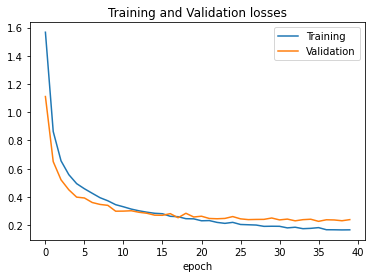

In [31]:
import matplotlib.pyplot as plt

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

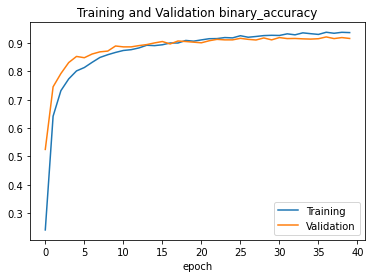

In [32]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation binary_accuracy')
plt.xlabel('epoch')

In [33]:
y_pred = best_model.predict(test_images)
y_pred

array([[3.04751597e-06, 3.38918483e-07, 6.03136874e-09, 2.45154924e-10,
        9.99996662e-01],
       [3.57728140e-06, 8.67695417e-06, 1.77200627e-06, 1.69542341e-06,
        9.99984264e-01],
       [3.76527325e-08, 1.53904466e-07, 7.08798797e-13, 9.99999762e-01,
        7.15602057e-12],
       ...,
       [9.84780669e-01, 1.34125147e-02, 1.11143360e-11, 1.80682982e-03,
        1.94587138e-10],
       [1.00830775e-02, 9.09655750e-01, 3.71530838e-02, 1.72309689e-02,
        2.58769598e-02],
       [9.99119580e-01, 8.13806662e-04, 3.37510193e-11, 6.65202970e-05,
        7.39629746e-10]], dtype=float32)

In [34]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([4, 4, 3, ..., 0, 1, 0])

# classification report & confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix, classification_report


cm = confusion_matrix(test_images.labels, y_pred)
print(cm)
print('classification report')
print( classification_report(test_images.labels, y_pred))


[[526  22   2   5   1]
 [ 39 460   2  42  13]
 [  7  18 516   3  12]
 [  8  45   1 493   9]
 [  7   6   1   5 537]]
classification report
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       556
           1       0.83      0.83      0.83       556
           2       0.99      0.93      0.96       556
           3       0.90      0.89      0.89       556
           4       0.94      0.97      0.95       556

    accuracy                           0.91      2780
   macro avg       0.91      0.91      0.91      2780
weighted avg       0.91      0.91      0.91      2780



# ploting the confusion matrix


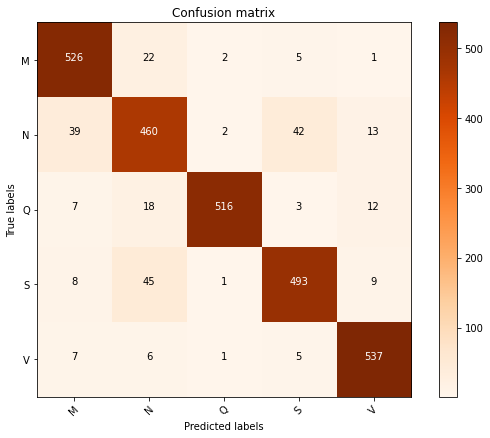

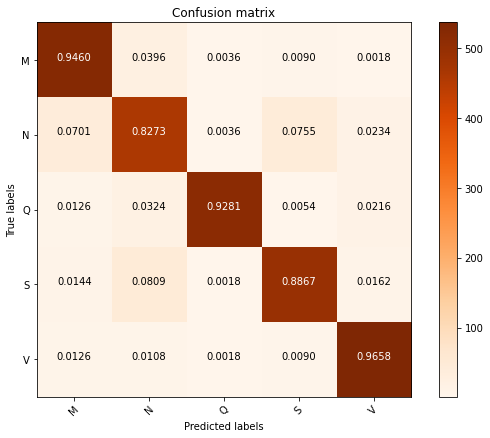

In [38]:
import itertools

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=False):
    """
    arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    """
     
    if cmap is None:
        cmap = plt.get_cmap('Oranges')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylim(len(target_names)-0.5, -0.5)
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.savefig(title + '.png', dpi=500, bbox_inches = 'tight')
    plt.show()
    
    
    
# a tuple for all the class names
target_names = ('M', 'N', 'Q', 'S', 'V' )
plot_confusion_matrix(cm, target_names)
plot_confusion_matrix(cm, target_names,normalize=True)
